本文描述了使用Python语言读取文本文件、对文本预处理、统计词频并可视化的流程。具体运行环境:
- Python:2.7版本，建议安装ananconda工具包（www.continuum.io/downloads）
- matplotlib:绘图工具包，anconda自带
- wordcloud:词云工具包，需要自己安装
- nltk:自然语言出来工具包，anaconda自带

## 读取文本

In [1]:
#指定文件路径
file = 'shakespeare.txt'#可以将该路径改成自己的文件

In [2]:
#遍历文件每一行
with open(file, 'r') as file:
    texts = file.readlines()

In [3]:
texts

['William Shakespeare was an English poet, playwright, and actor, widely regarded as the greatest writer in the English language and the world\'s pre-eminent dramatist.[2] He is often called England\'s national poet, and the "Bard of Avon".[3][nb 2] His extant works, including collaborations, consist of approximately 38 plays,[nb 3] 154 sonnets, two long narrative poems, and a few other verses, some of uncertain authorship. His plays have been translated into every major living language and are performed more often than those of any other playwright.[4]\n',
 '\n',
 "Shakespeare was born and brought up in Stratford-upon-Avon, Warwickshire. At the age of 18, he married Anne Hathaway, with whom he had three children: Susanna, and twins Hamnet and Judith. Sometime between 1585 and 1592, he began a successful career in London as an actor, writer, and part-owner of a playing company called the Lord Chamberlain's Men, later known as the King's Men. He appears to have retired to Stratford arou

In [4]:
type(texts)

list

In [5]:
texts[0]

'William Shakespeare was an English poet, playwright, and actor, widely regarded as the greatest writer in the English language and the world\'s pre-eminent dramatist.[2] He is often called England\'s national poet, and the "Bard of Avon".[3][nb 2] His extant works, including collaborations, consist of approximately 38 plays,[nb 3] 154 sonnets, two long narrative poems, and a few other verses, some of uncertain authorship. His plays have been translated into every major living language and are performed more often than those of any other playwright.[4]\n'

## 文本预处理

In [6]:
#去除标点符号
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#Preprocess the original texts
def textClear(s):
    #Remove punctuation
    s = re.sub('['+string.punctuation+']', ' ', s)
    #Remove digits
    s = re.sub('[0-9]', ' ', s)
    #Remove extra blanks
    s = re.sub('[ ]+', ' ', s)
    #Remove ending '\n'
    s = re.sub('\n', '', s)
    #Turn to lower form
    s = s.lower()
    return s

In [8]:
texts = [textClear(text) for text in texts]

In [9]:
texts

['william shakespeare was an english poet playwright and actor widely regarded as the greatest writer in the english language and the world s pre eminent dramatist he is often called england s national poet and the bard of avon nb his extant works including collaborations consist of approximately plays nb sonnets two long narrative poems and a few other verses some of uncertain authorship his plays have been translated into every major living language and are performed more often than those of any other playwright ',
 '',
 'shakespeare was born and brought up in stratford upon avon warwickshire at the age of he married anne hathaway with whom he had three children susanna and twins hamnet and judith sometime between and he began a successful career in london as an actor writer and part owner of a playing company called the lord chamberlain s men later known as the king s men he appears to have retired to stratford around at age where he died three years later few records of shakespeare

In [10]:
#每个链表的文本进行分词
texts  = [text.split() for text in texts]

In [11]:
texts[0][:10]

['william',
 'shakespeare',
 'was',
 'an',
 'english',
 'poet',
 'playwright',
 'and',
 'actor',
 'widely']

In [12]:
#将所有的单词合并成一个集合
tokens_all = []
_ = [tokens_all.extend(text) for text in texts]

In [13]:
len(tokens_all)

399

In [14]:
tokens_all[:10]

['william',
 'shakespeare',
 'was',
 'an',
 'english',
 'poet',
 'playwright',
 'and',
 'actor',
 'widely']

## 统计单词和词频

In [16]:
#Count the frequencies of each word
word_freq_dict = {}
for word in tokens_all:
    word_freq_dict[word] = word_freq_dict.get(word, 0) + 1
    #if word not in word_freq_dict.keys():
        #word_freq_dict[word] = 0
    #else:
        #word_freq_dict[word] += 1

In [19]:
#word_freq_dict

### 排序方法1

In [20]:
#Comprehension
freq_word_sets = [(v, k) for k, v in word_freq_dict.items()]
freq_word_sets[:10]

[(2, 'all'),
 (1, 'henry'),
 (1, 'text'),
 (1, 'varying'),
 (1, 'mainly'),
 (1, 'definitive'),
 (1, 'years'),
 (1, 'verses'),
 (1, 'finest'),
 (2, 'including')]

In [21]:
freq_word_sets.sort(reverse=True)
freq_word_sets[:10]

[(24, 'and'),
 (16, 'of'),
 (15, 'the'),
 (12, 'in'),
 (11, 'his'),
 (9, 'as'),
 (8, 'he'),
 (7, 'shakespeare'),
 (6, 's'),
 (6, 'plays')]

In [22]:
freq_word_unzip = zip(*freq_word_sets)

In [23]:
#获取频率和对应的单词
freqs, words = freq_word_unzip[0], freq_word_unzip[1]

### 排序方法2

In [24]:
#zip方法
freq_word_sets = zip(word_freq_dict.values(), word_freq_dict.keys())

In [25]:
freq_word_sets = list(freq_word_sets)
freq_word_sets.sort(reverse=True)
freq_word_sets[:12]

[(24, 'and'),
 (16, 'of'),
 (15, 'the'),
 (12, 'in'),
 (11, 'his'),
 (9, 'as'),
 (8, 'he'),
 (7, 'shakespeare'),
 (6, 's'),
 (6, 'plays'),
 (6, 'a'),
 (5, 'works')]

In [41]:
results = sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)
print(results)

[('and', 24), ('of', 16), ('the', 15), ('in', 12), ('his', 11), ('as', 9), ('he', 8), ('shakespeare', 7), ('plays', 6), ('s', 6), ('a', 6), ('works', 5), ('known', 4), ('to', 3), ('some', 3), ('language', 3), ('two', 3), ('are', 3), ('by', 3), ('which', 3), ('was', 3), ('with', 3), ('were', 3), ('an', 3), ('have', 3), ('nb', 3), ('other', 3), ('english', 3), ('age', 3), ('all', 2), ('including', 2), ('world', 2), ('regarded', 2), ('writer', 2), ('produced', 2), ('wrote', 2), ('often', 2), ('between', 2), ('men', 2), ('avon', 2), ('about', 2), ('published', 2), ('playwright', 2), ('stratford', 2), ('few', 2), ('three', 2), ('been', 2), ('poet', 2), ('more', 2), ('but', 2), ('king', 2), ('work', 2), ('called', 2), ('at', 2), ('is', 2), ('performed', 2), ('actor', 2), ('later', 2), ('henry', 1), ('text', 1), ('varying', 1), ('mainly', 1), ('definitive', 1), ('years', 1), ('verses', 1), ('finest', 1), ('during', 1), ('religious', 1), ('children', 1), ('collaborated', 1), ('now', 1), ('had'

### 方法3

In [33]:
#使用Counter工具包直接统计词频
from collections import Counter
word_freq = Counter(tokens_all)

In [39]:
print(word_freq)

Counter({'and': 24, 'of': 16, 'the': 15, 'in': 12, 'his': 11, 'as': 9, 'he': 8, 'shakespeare': 7, 'plays': 6, 's': 6, 'a': 6, 'works': 5, 'known': 4, 'to': 3, 'some': 3, 'language': 3, 'two': 3, 'are': 3, 'by': 3, 'which': 3, 'was': 3, 'with': 3, 'were': 3, 'an': 3, 'have': 3, 'nb': 3, 'other': 3, 'english': 3, 'age': 3, 'all': 2, 'including': 2, 'world': 2, 'regarded': 2, 'writer': 2, 'produced': 2, 'wrote': 2, 'often': 2, 'between': 2, 'men': 2, 'avon': 2, 'about': 2, 'published': 2, 'playwright': 2, 'stratford': 2, 'few': 2, 'three': 2, 'been': 2, 'poet': 2, 'more': 2, 'but': 2, 'king': 2, 'work': 2, 'called': 2, 'at': 2, 'is': 2, 'performed': 2, 'actor': 2, 'later': 2, 'henry': 1, 'text': 1, 'varying': 1, 'mainly': 1, 'definitive': 1, 'years': 1, 'verses': 1, 'finest': 1, 'during': 1, 'religious': 1, 'children': 1, 'collaborated': 1, 'now': 1, 'had': 1, 'histories': 1, 'considerable': 1, 'th': 1, 'lord': 1, 'has': 1, 'chamberlain': 1, 'then': 1, 'around': 1, 'early': 1, 'records': 

In [35]:
results = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

## 可视化

In [56]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
plt.style.use('ggplot')

In [54]:
words = list(words)
freqs = list(freqs)

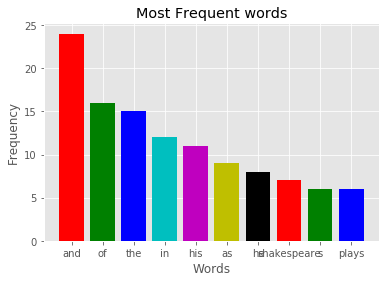

In [55]:
labels_selected = words[:10]
freqs_selected = freqs[:10]
left = range(10)
colors = 'rgbcmyk'
plt.bar(left=left,height=freqs_selected,tick_label=labels_selected,align='center',color=colors)
plt.title('Most Frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')

In [61]:
wordcloud = WordCloud(background_color='white',scale=1.5).generate(' '.join(tokens_all))

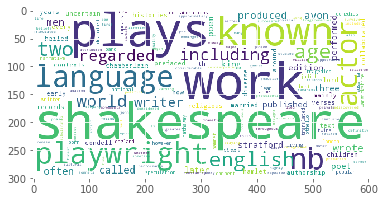

In [62]:
plt.imshow(wordcloud)

## 去除连接词
在各类语言中，都有一些经常性用到的代词、助词以及语气词等。这些词对文档意义本身没有多大影响，称之为连接词(stopwords)，可以去掉。用户可以自己指定连接词，也可以从现有库中获取。在这里，我们使用nltk工具包。

In [37]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

In [38]:
#显示连接词
print(stop_words)

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [72]:
#过滤连接词以及对于的词频
words_filtered = []
freqs_filtered = []
for i, word in enumerate(words):
    if word not in stop_words:
        words_filtered.append(word)
        freqs_filtered.append(freqs[i])

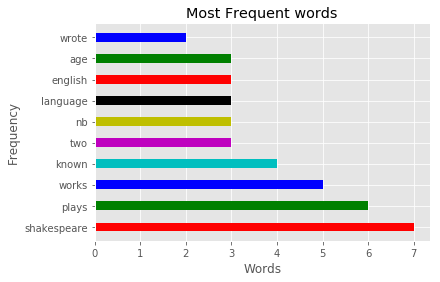

In [81]:
#重新可视化
labels_selected = words_filtered[:10]
freqs_selected = freqs_filtered[:10]
bottom = range(0, 20, 2)
colors = 'rgbcmyk'
#因为单词较长，所以用横式柱形图
plt.barh(bottom=bottom,width=freqs_selected,tick_label=labels_selected,align='center',color=colors)
plt.title('Most Frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')

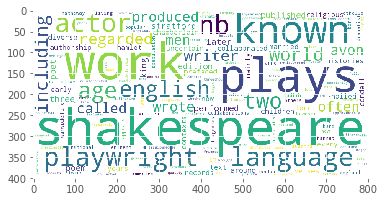

In [85]:
wordcloud = WordCloud(background_color='white',scale=2).generate(' '.join(tokens_all))
plt.imshow(wordcloud)

可以看出词云上比较明显的单词与上图单词频率分布一致。

## 参考文献

- 1.生成词云之python中WordCloud包的用法， http://blog.csdn.net/u010309756/article/details/67637930
- 2.去除连接词， http://www.cnblogs.com/yuxc/archive/2011/07/09/2102015.html